In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 读取二进制数组（需知道数据类型和形状）
data_file_path = '/home/fys/BasicTS/datasets/ETTh1/data.dat'
data = np.memmap(data_file_path, dtype='float32', mode='r', shape=(14400, 7, 5))
print(data.shape)

(14400, 7, 5)


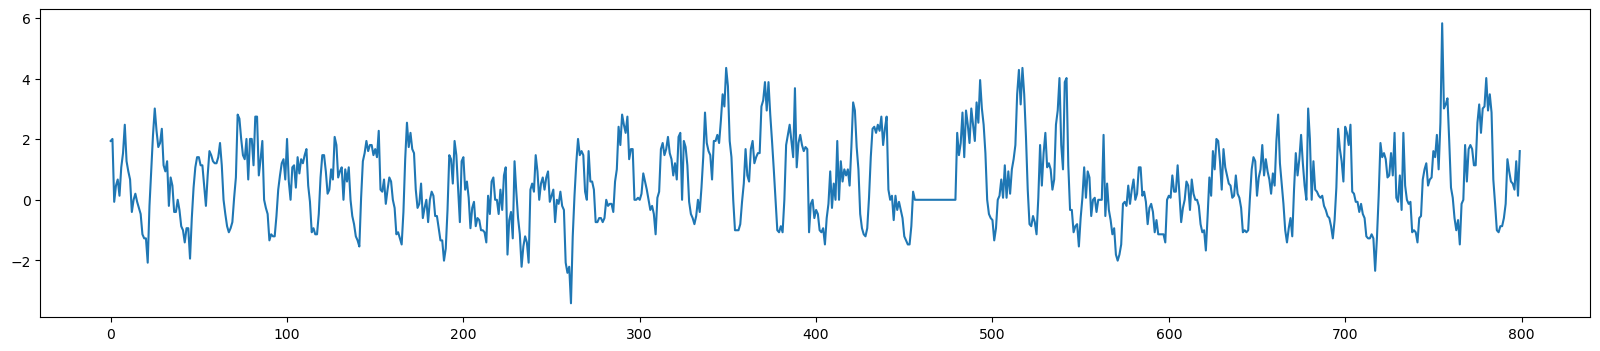

In [47]:
plt.figure(figsize=(20, 4))
plt.plot(data[-8304:-8304+800, 1, 0])

In [2]:
stats = np.load('/home/fys/BasicTS/stats_ep1.npy')
print(stats.shape)

(8304, 7, 2)


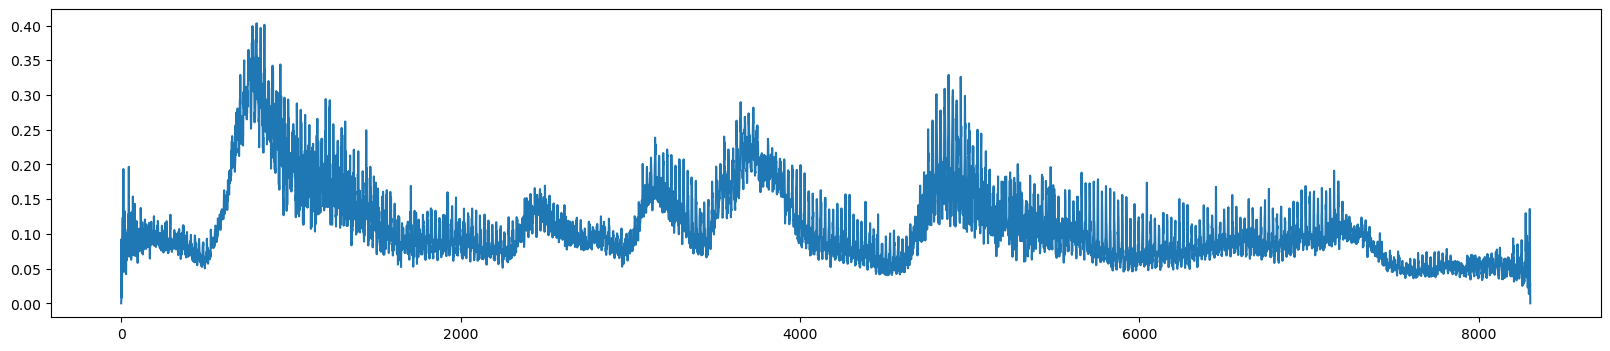

In [4]:
plt.figure(figsize=(20, 4))
plt.plot(np.abs(stats[:, 1, 1]))

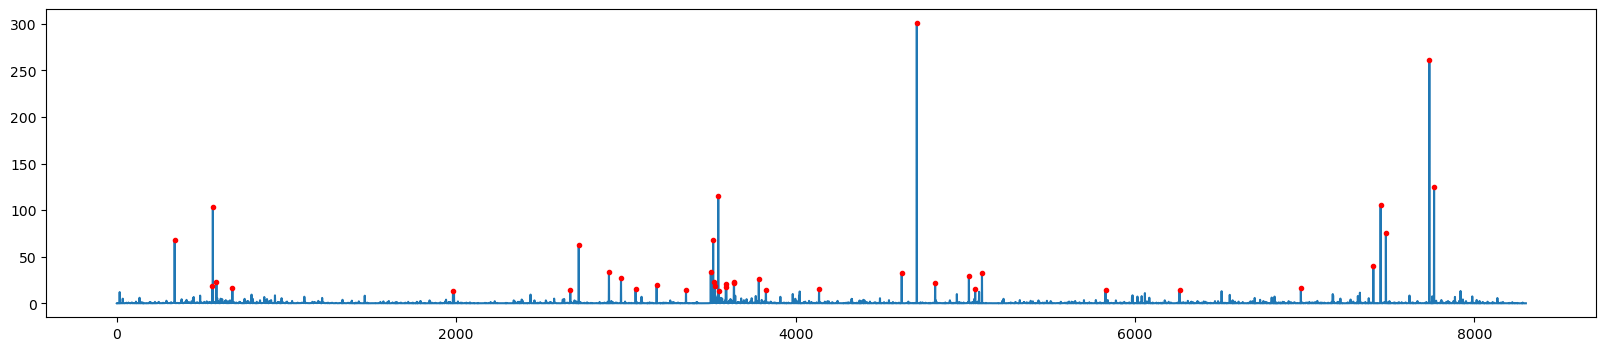

In [48]:
stats1 = np.load('/home/fys/BasicTS/stats_ep1_0.npy')
coe = np.abs(stats1[:, :, 1] / (stats[:, :, 0] + 1e-8))
plt.figure(figsize=(20, 4))

# K = 10
# n = stats1.shape[0]
# k = int(np.round(n * K / 100))
topk_ids = np.argsort(-coe[:, 4])[:40]
# print(topk_ids)
# print(stats1[topk_ids, 0, 0])
# print(topk_ids[:, 0])

plt.plot(coe[:, 4])
plt.plot(topk_ids, coe[topk_ids, 4], 'ro', markersize=3)

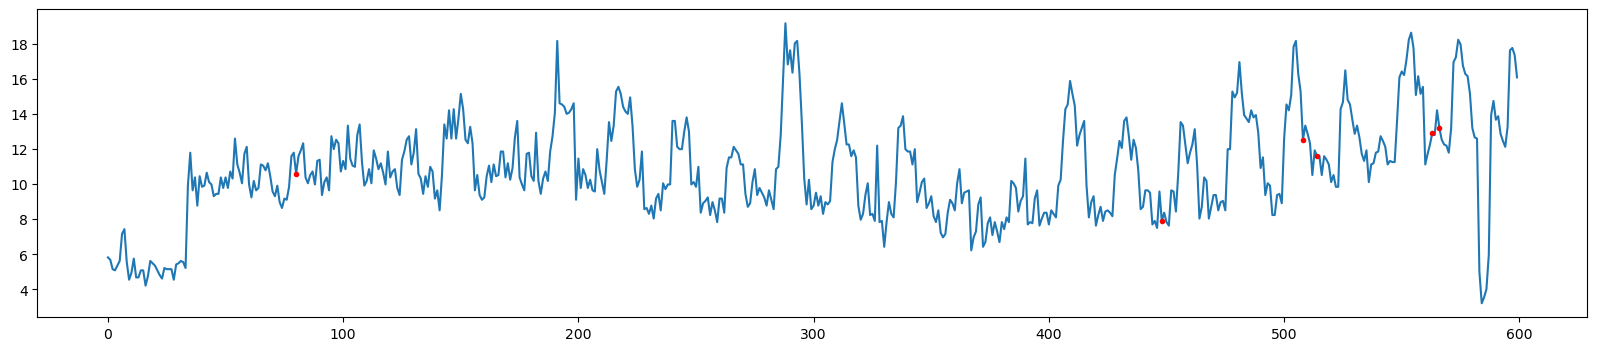

In [41]:
plt.figure(figsize=(20, 4))
plt.plot(data[:600, 0, 0])
a = np.where(topk_ids < 600)
plt.plot(topk_ids[a], data[topk_ids[a], 0, 0], 'ro', markersize=3)

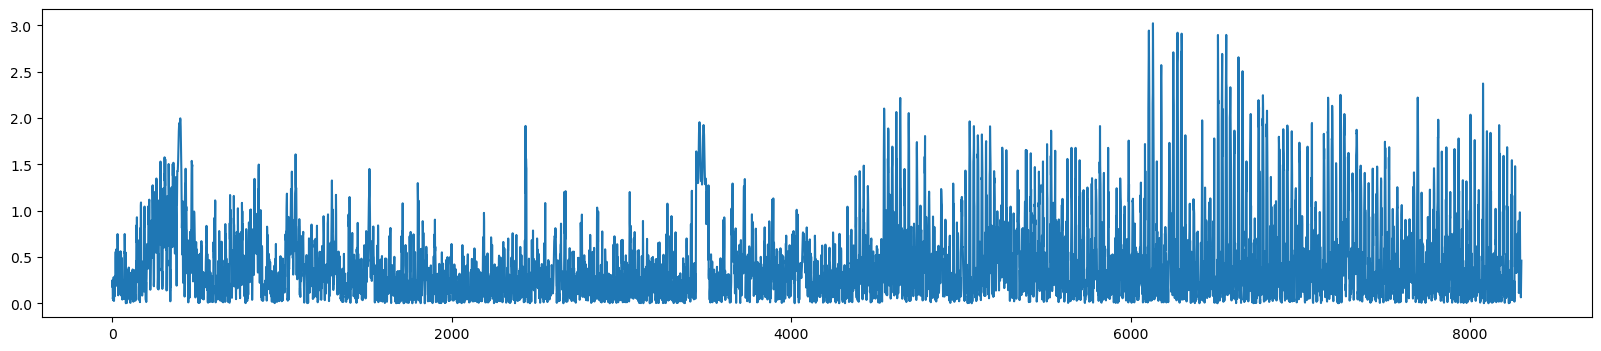

In [42]:
stats1 = np.load('/home/fys/BasicTS/stats_ep1.npy')
plt.figure(figsize=(20, 4))
plt.plot(np.abs(stats1[:, 0, 0]))

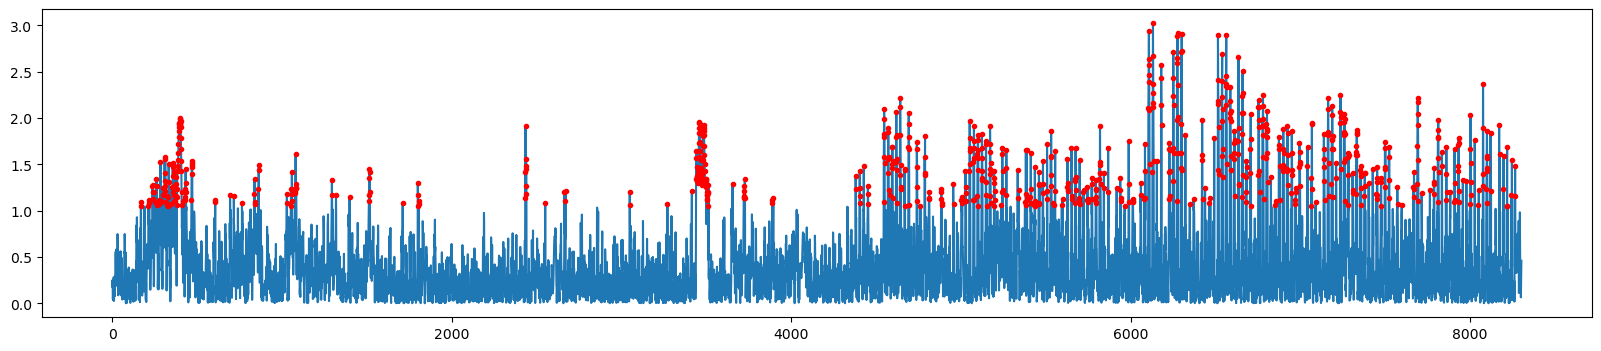

In [52]:
K = 10
raw_data = np.abs(stats[:, 0, 0])
data1 = raw_data
n = data1.size
k = int(np.round(n * K / 100))
topk_ids = np.argsort(-data1)[:k]
plt.figure(figsize=(20, 4))
plt.plot(raw_data)
plt.plot(topk_ids, raw_data[topk_ids], 'ro', markersize=3)

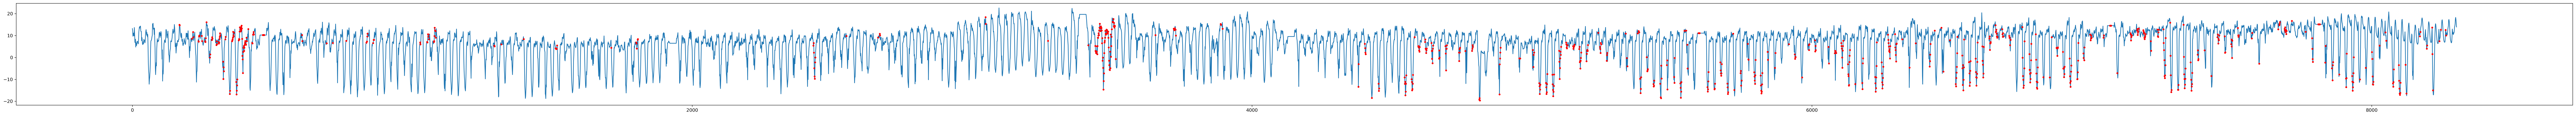

In [55]:
data_ = data[-8304:, 0, 0]
plt.figure(figsize=(100, 4), dpi=300)
plt.plot(data_)
plt.plot(topk_ids, data_[topk_ids], 'ro', markersize=3)
plt.savefig('topk.png')

In [ ]:
a = torch.Tensor([[2,3,4,5,6,7],
                  [3,4,5,6,7,8],
                  [4,5,6,7,8,9]])
unique_ids, inverse_indices = torch.unique(a, return_inverse=True)
counts_new = torch.bincount(inverse_indices.view(-1)).float()
print(unique_ids)
print(inverse_indices)

sum_x = torch.zeros((len(unique_ids), 1))
sum_x.scatter_add_(0, inverse_indices.view(-1, 1), a.view(-1, 1))
mean_x = sum_x / counts_new.view(-1, 1)
print(mean_x)


tensor([2., 3., 4., 5., 6., 7., 8., 9.])
tensor([[0, 1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5, 6],
        [2, 3, 4, 5, 6, 7]])
tensor([[2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


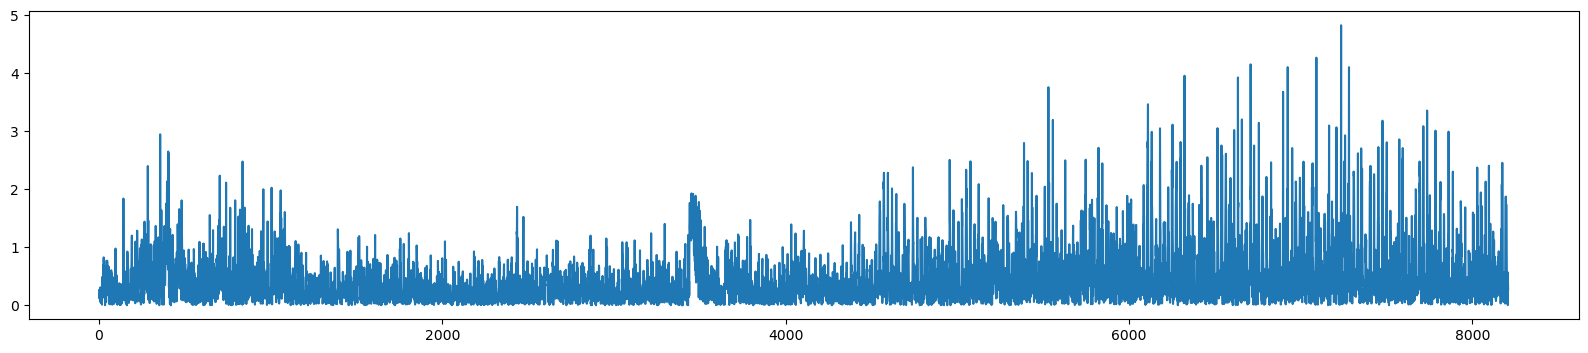

In [27]:
data_1 = np.load('/home/fys/BasicTS/history_loss/ETTh1_336_96/history_loss_1.npy',allow_pickle=True)
data_1 = np.abs(data_1)
plt.figure(figsize=(20, 4))
plt.plot(data_1[:, 0, 0])

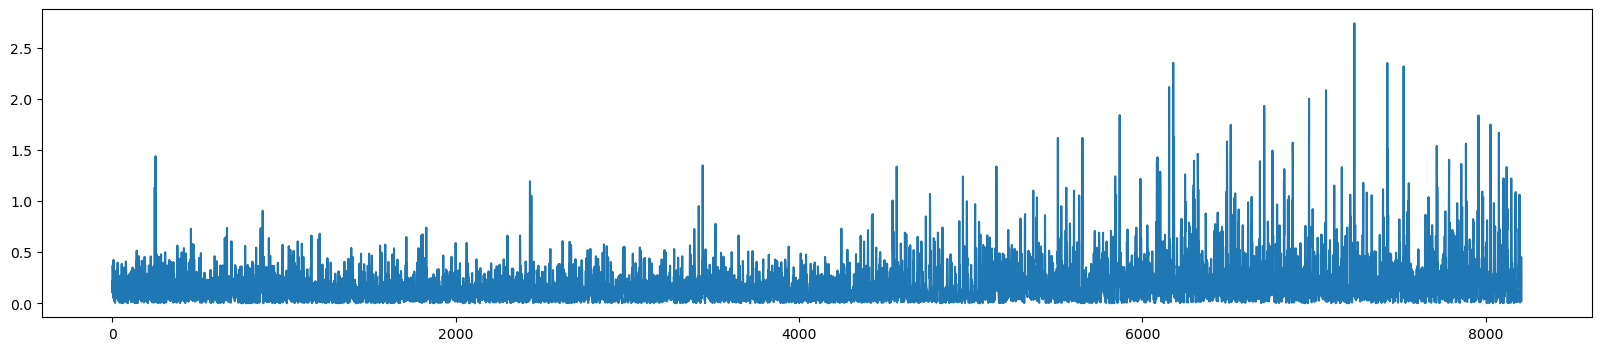

In [28]:
data_100 = np.load('/home/fys/BasicTS/history_loss/ETTh1_336_96/history_loss_100.npy',allow_pickle=True)
data_100 = np.abs(data_100)
plt.figure(figsize=(20, 4))
plt.plot(data_100[:, 0, 0])

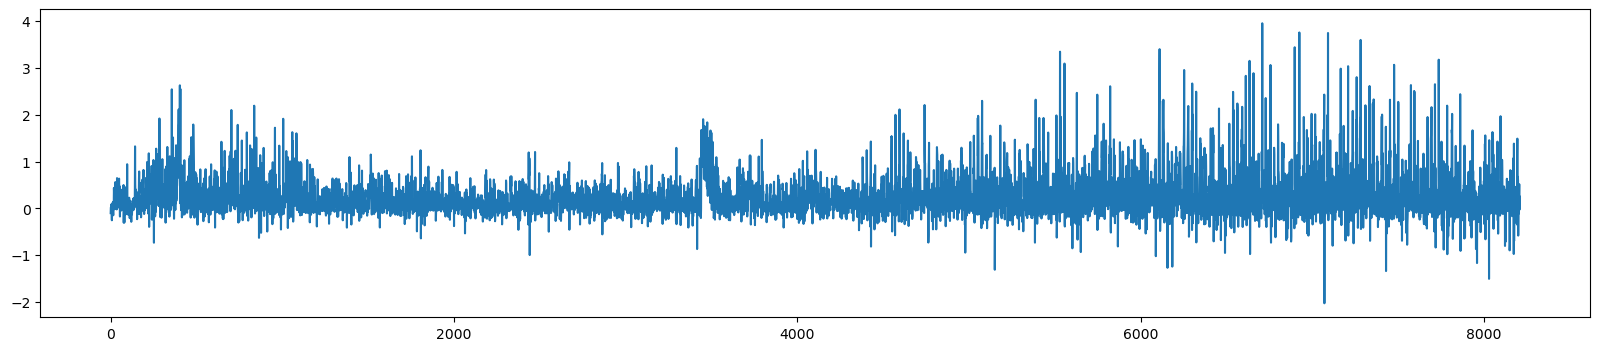

In [29]:
excess_loss = data_1[:, 0, 0]-data_100[:,0,0]
plt.figure(figsize=(20, 4))
plt.plot(excess_loss)

In [25]:
first = data_1.reshape(-1, 7)
print(first.shape)
last = data_100.reshape(-1, 7)
excess = first - last

ratio = np.mean(excess < 0, axis = -1)
print(ratio)

(788064, 7)


KeyboardInterrupt: 